<h1><b>Predicting if a person would buy life insurnace based on his age using logistic regression</b></h1><br>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [103]:
import pandas as  pd
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
df = pd.read_csv('insurance_data.csv')
df.head(10)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


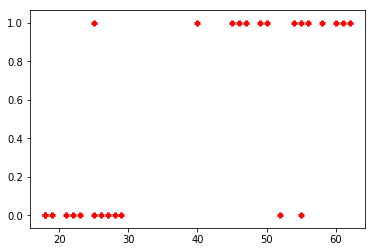

In [105]:
plt.scatter(df.age, df.bought_insurance, color='red', marker='+', linewidth='3' )

In [106]:
X = df[['age']]
X.head()

,age
0,22
1,25
2,47
3,52
4,46


In [107]:
y = df.bought_insurance
y.head()

0    0
1    0
2    1
3    0
4    1
Name: bought_insurance, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [109]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [110]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
log_reg.predict(X_test)

array([1, 0, 0], dtype=int64)

In [112]:
log_reg.score(X_test, y_test)

1.0

In [113]:
log_reg.predict_proba(X_test)

array([[ 0.26512076,  0.73487924],
       [ 0.55864439,  0.44135561],
       [ 0.51968091,  0.48031909]])

In [114]:
log_reg.coef_

array([[ 0.05229929]])

In [115]:
log_reg.intercept_

array([-1.59544372])

<h1><b>Exercise</b></h1>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)<br>
2.Plot bar charts showing impact of employee salaries on retention<br>
3.Plot bar charts showing corelation between department and employee retention<br>
4.Now build logistic regression model using variables that were narrowed down in step 1<br>
5.Measure the accuracy of the model

In [174]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [200]:
df.shape

(14999, 10)

<h3><b>Data exploration and visualization</b></h3>

In [175]:
left = df[df['left']==1]
left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [176]:
left.shape

(3571, 10)

In [177]:
retained = df[df['left']==0]
retained.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [178]:
retained.shape

(11428, 10)

In [179]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<h4><b>Impact of salary on employee retention</b></h4>

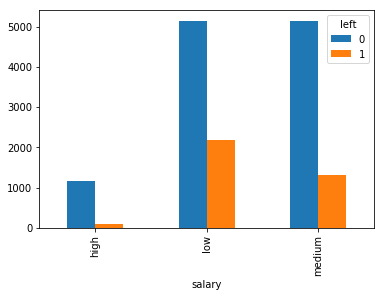

In [180]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

<h4><b>Department wise employee retention rate</b></h4>

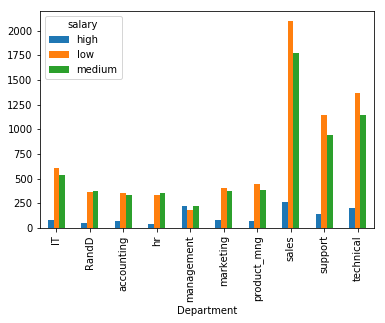

In [181]:
pd.crosstab(df.Department, df.salary).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

From the data analysis so far we can conclude that we will use following variables as dependant variables in our model<br>
**Satisfaction Level**<br>
**Average Monthly Hours**<br>
**Promotion Last 5 Years**<br>
**Salary**

In [182]:
subdf = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [183]:
df_dummies = pd.get_dummies(subdf.salary)
df_dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [184]:
merged_df = pd.concat([subdf, df_dummies], axis='columns')
merged_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [185]:
merged_df.drop('salary', axis='columns', inplace=True)
merged_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [186]:
X = merged_df
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [187]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [257]:
X_train.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
5660,0.75,260,0,0,1,0
13062,0.50,170,0,0,1,0
3732,0.29,162,0,0,0,1
5812,0.44,119,0,0,1,0
3671,0.70,224,0,0,1,0


In [258]:
X_train.shape

(10499, 6)

In [259]:
y_train.head()

5660     0
13062    0
3732     0
5812     0
3671     0
Name: left, dtype: int64

In [260]:
y_train.shape

(10499,)

In [261]:
X_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
11408,0.69,264,0,0,0,1
7657,0.75,171,0,0,1,0
7610,0.49,185,0,0,0,1
6019,0.50,269,0,0,0,1
5979,0.48,210,0,0,0,1


In [262]:
X_test.shape

(4500, 6)

In [263]:
y_test.head()

11408    0
7657     0
7610     0
6019     0
5979     0
Name: left, dtype: int64

In [264]:
y_test.shape

(4500,)

In [265]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [266]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [267]:
log_reg.coef_

array([[ -3.73481712e+00,   2.81727383e-03,  -9.98942981e-01,
         -1.12390397e+00,   7.44178038e-01,   2.87940649e-01]])

In [268]:
log_reg.intercept_

array([-0.09178528])

In [269]:
log_reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [270]:
log_reg.predict_proba(X_test)

array([[ 0.83714106,  0.16285894],
       [ 0.84117093,  0.15882907],
       [ 0.75263387,  0.24736613],
       ..., 
       [ 0.83516587,  0.16483413],
       [ 0.57130502,  0.42869498],
       [ 0.87191912,  0.12808088]])

In [271]:
log_reg.score(X_test, y_test)

0.77177777777777778